# BCPE Assignment

### Bayesian Neural Network


##### What to do?
Implement:
1. the NN
2. Vectorizer/devectorizer
    - We must have a way to collect all the params of the NN into a vector and back (pCN)
3. Log-prior and log-likelihood
    - Functions of the params vector
4. MCMC or pullbacks (gradient)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.stats as stats
import statsmodels.api as sm

#### Defining the Neural Network

In [104]:
class FCLayer:

    def __init__(self, 
                input_size: int,
                output_size: int) -> None:
        self.input = None
        self.output = None

        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1,output_size) - 0.5

    def forward(self, input: np.array)-> np.array:
        self.input = input.T
        self.output = self.input @ self.weights + self.bias
        return self.output

    def backpropagation(self,
                        output_error,
                        learning_rate: np.float64):
        input_error = output_error @ self.weights.T
        weights_error = self.input @ output_error
        
        self.weights -= weights_error * learning_rate
        self.bias -= weights_error * learning_rate

        return input_error

In [105]:
class ActivationLayer:

    def __init__(self,
                activation_function,
                activation_function_derivative) -> None:
        self.activation = activation_function
        self.activation_derivative = activation_function_derivative

    def forward(self,
                input_data):
        self.input = input_data.T
        return self.activation(self.input)
    
    def backpropagation(self,
                        output_error,
                        learning_rate: np.float64):
        return self.activation_derivative(self.input) * output_error
    


def tanh(x):
    return np.tanh(x);

def tanh_derivative(x):
    return 1-np.tanh(x)**2;

In [106]:
def loss(y, y_hat):
    return np.mean(np.power(y - y_hat, 2))

def loss_derivative(y, y_hat):
    return 2 * (y_hat - y)/y.size


In [131]:
class NN:
    
    def __init__(self) -> None:
        
        self.layers = []
        self.loss = None
        self.loss_derivative = None

    def add(self, layer) -> None:
        self.layers.append(layer)

    def add_loss(self, loss, loss_derivative) -> None:
        self.loss = loss
        self.loss_derivative = loss_derivative

    def fit(self, X_train,
            y_train,
            epochs=100,
            learning_rate=0.01,
            batch_size=128):

        n_samples = len(y_train)
        n_layers = len(self.layers)

        err = []

        for epoch in range(0, epochs):

            err.append(0)

            batch = batch_size
            for sample in range(0, n_samples):
                batch -= 1
                output = X_train[sample,:]

                for layer in range(0, n_layers):
                    output = self.layers[layer].forward(output)

                err[epoch] = err[epoch] + self.loss(y_train[sample], output)

                error = self.loss_derivative(y_train[sample], output)

                if batch == 0:
                    for ii in range(0, n_layers):
                        error = self.layers[n_layers -1 - ii].backpropagation(error, learning_rate)
                    batch = batch_size


            err[epoch] = err[epoch]/n_samples

            print(f"Epoch: {epoch}, error: {err[epoch]}")

    def predict(self, train_X: np.array):
        n_samples = len(train_X)

        result = []


        for ii in range(0, n_samples):

            output = train_X[ii,:]

            for layer in self.layers:
                output = layer.forward(output)

            result.append(output)

        return result


        

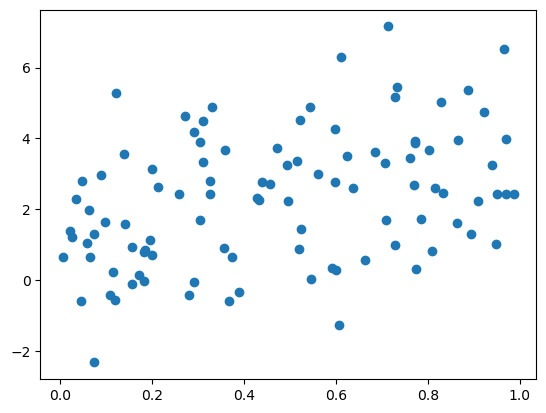

In [132]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
num_samples = 100

# Generate three input vectors (X) with random noise
X1 = np.random.rand(num_samples)  # First input vector
X2 = np.random.rand(num_samples)  # Second input vector
X3 = np.random.rand(num_samples)  # Third input vector

# Generate an output vector (y) with random noise
true_relationship = 2 * X1 + 3 * X2 - 0.5 * X3  # True relationship between X and y
measurement_error = np.random.randn(num_samples)  # Random noise with mean 0 and standard deviation 1
y = true_relationship + measurement_error

# Optionally, add more noise to y to simulate measurement errors
measurement_error_y = np.random.randn(num_samples)  # Additional noise for y
y += measurement_error_y

# Optionally, reshape X and y to make them 2D arrays if needed
X = np.column_stack((X1, X2, X3))  # Combine X1, X2, and X3 into a single 2D array

plt.scatter(X[:,0], y)

In [133]:
# network
net = NN()
net.add(FCLayer(3, 3))
net.add(ActivationLayer(tanh, tanh_derivative))
net.add(FCLayer(3, 1))
net.add(ActivationLayer(tanh, tanh_derivative))

# train
net.add_loss(loss, loss_derivative)
net.fit(X, y, epochs=1000, learning_rate=0.1)

# test
out = net.predict(X)

mse = loss(y, out)/len(y)
mse

Epoch: 0, error: 9.441523892656358
Epoch: 1, error: 9.441523892656358
Epoch: 2, error: 9.441523892656358
Epoch: 3, error: 9.441523892656358
Epoch: 4, error: 9.441523892656358
Epoch: 5, error: 9.441523892656358
Epoch: 6, error: 9.441523892656358
Epoch: 7, error: 9.441523892656358
Epoch: 8, error: 9.441523892656358
Epoch: 9, error: 9.441523892656358
Epoch: 10, error: 9.441523892656358


Epoch: 11, error: 9.441523892656358
Epoch: 12, error: 9.441523892656358
Epoch: 13, error: 9.441523892656358
Epoch: 14, error: 9.441523892656358
Epoch: 15, error: 9.441523892656358
Epoch: 16, error: 9.441523892656358
Epoch: 17, error: 9.441523892656358
Epoch: 18, error: 9.441523892656358
Epoch: 19, error: 9.441523892656358
Epoch: 20, error: 9.441523892656358
Epoch: 21, error: 9.441523892656358
Epoch: 22, error: 9.441523892656358
Epoch: 23, error: 9.441523892656358
Epoch: 24, error: 9.441523892656358
Epoch: 25, error: 9.441523892656358
Epoch: 26, error: 9.441523892656358
Epoch: 27, error: 9.441523892656358
Epoch: 28, error: 9.441523892656358
Epoch: 29, error: 9.441523892656358
Epoch: 30, error: 9.441523892656358
Epoch: 31, error: 9.441523892656358
Epoch: 32, error: 9.441523892656358
Epoch: 33, error: 9.441523892656358
Epoch: 34, error: 9.441523892656358
Epoch: 35, error: 9.441523892656358
Epoch: 36, error: 9.441523892656358
Epoch: 37, error: 9.441523892656358
Epoch: 38, error: 9.44152389

0.09370220033456729

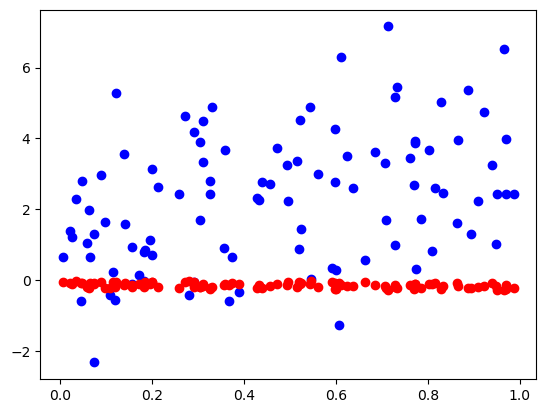

In [134]:
plt.scatter(X[:,0], y, c='b')
plt.scatter(X[:,0], out, c='r')

In [135]:
y-out

array([[[ 0.73490106,  2.5310005 ,  5.53647799, ...,  2.39928102,
          1.2963197 , -0.3325781 ]],

       [[ 0.92308472,  2.71918416,  5.72466165, ...,  2.58746468,
          1.48450336, -0.14439444]],

       [[ 0.87531462,  2.67141406,  5.67689154, ...,  2.53969458,
          1.43673325, -0.19216454]],

       ...,

       [[ 0.87215302,  2.66825246,  5.67372994, ...,  2.53653298,
          1.43357165, -0.19532614]],

       [[ 0.75767792,  2.55377735,  5.55925484, ...,  2.42205787,
          1.31909655, -0.30980124]],

       [[ 0.86704824,  2.66314768,  5.66862516, ...,  2.5314282 ,
          1.42846687, -0.20043092]]])